<a href="https://www.kaggle.com/code/maldo0/space-mission-launches?scriptVersionId=180080995" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Space Mission Launches Data Analytics Project

##### *by Franco Maldonado*

This is part of Space Mission Launches Data Analytics Data: Cleaning, analysis and visualization
and this workbook has been created to document the entire process of data analysis, cleaning and visualization, and to show the skills and tools to be used. 

## Project background

I Worked with an incredibly rich dataset from nextspaceflight.com that includes all space missions since the beginning of the US-Soviet space race in 1957. 
It contains data on mission status (success/failure), mission cost, number of launches per country and much more. There is much we can learn from this data set about dominant organizations and trends over time.

# Ask
#### Objectives:

  1. Which organization launched the most space missions in a given year?
  2. How many launches were performed per year? 
  3. How has the cost of a space mission varied over time?
  4. What months are the most popular for launches? 
  5. Have space missions become safer or have the chances of failure remained unchanged?
  
**Business task :** Develop a report detailing trends and patterns in space mission launches to improve future launch planning and strategy. This report should help identify optimal periods for launching missions, assess cost trends, and improve mission safety.


# Prepare

#### Objectives:

  1. Download  data and store it appropriately.
  2. Identify how it's organized
  3. Sort and filter the data

The data set that is being used for this project is the [Space Mission Launches](https://www.kaggle.com/datasets/sefercanapaydn/mission-launches) that is hosted on the Kaggle platform as a public dataset. 

Limitations of data:
   1. Data is collected back in 2022, it is not current
  

# Process
#### Objectives:
# 1. Check the data for errors
2. Choose your tools
3. Transform the data so you can work with it effectively
4. Document the cleaning process

The tool I decided to use is the Python language. This is because the data set is very large and cannot be handled efficiently by spreadsheets. On the other hand, using SQL would force us to load the data into BigQuery or employ other additional software. With Python, on the other hand, we can document, process, analyze and visualize our data in a single environment.


In [ ]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1- Which organization launched the most missions in a given year?** ** For this question, we must count the number of launches by organization and year.
**For this question, we must count the number of launches by organization and year, and then identify the organization with the maximum number of launches for each year.**

In [ ]:
# Make sure the date column is in datetime format.
df['Date'] = pd.to_datetime(df['Date'])
# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

In [ ]:
# Count the number of launches per organization and year
launches_per_year_org = df.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')

# Identify the organization with the maximum number of launches per year.
top_org_per_year = launches_per_year_org.loc[launches_per_year_org.groupby('Year')['Launches'].idxmax()]

print(top_org_per_year)

# 2- How many launches were made per year?
**For this, we simply count the total number of launches per year**.

In [ ]:
# Count the number of launches per year
launches_per_year = df.groupby('Year').size().reset_index(name='Launches')

print(launches_per_year)

# 3- How has the cost of a space mission varied over time?
**Let's analyze the Price column and see how it has changed over the years. For this, we need to calculate the average cost per year**.

In [ ]:
# Make sure that the Price column is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate the average cost of missions per year
average_cost_per_year = df.groupby('Year')['Price'].mean().reset_index()

print(average_cost_per_year)

*      Year  Launches
* 0   1957.0         3
* 1   1958.0        22
* 2   1959.0        20
* 3   1960.0        38
* 4   1961.0        52
* ..     ...       ...
* 59  2016.0        88
* 60  2017.0        90
* 61  2018.0       117
* 62  2019.0       107
* 63  2020.0        63
* 
* [64 rows x 2 columns]

# 4- What are the most popular months for launches?
**For this, we extract the month from the date column and count the number of launches per month **.

In [ ]:
# Extract the month from the Date column
df['Month'] = df['Date'].dt.month

# Count the number of launches per month
launches_per_month = df.groupby('Month').size().reset_index(name='Launches')

print(launches_per_month)

*     Month  Launches
* 0     1.0       265
* 1     2.0       323
* 2     3.0       349
* 3     4.0       366
* 4     5.0       320
* 5     6.0       386
* 6     7.0       347
* 7     8.0       358
* 8     9.0       354
* 9    10.0       375
* 10   11.0       325
* 11   12.0       430

# 5- Have space missions become safer or have the failure probabilities remained unchanged?
**To answer this question, let's analyze the Mission_Status column and calculate the success and failure rate per year **.

In [ ]:
# Count the number of successes and failures per year.
mission_status_per_year = df.groupby(['Year', 'Mission_Status']).size().unstack(fill_value=0).reset_index()

print(mission_status_per_year)

* Mission_Status    Year  Failure  Partial Failure  Prelaunch Failure  Success
* 0               1957.0        1                0                  0        2
* 1               1958.0       14                2                  0        6
* 2               1959.0        9                3                  0        8
* 3               1960.0       19                0                  0       19
* 4               1961.0       17                3                  0       32
* ..                 ...      ...              ...                ...      ...
* 59              2016.0        2                1                  1       84
* 60              2017.0        5                2                  0       83
* 61              2018.0        2                2                  0      113
* 62              2019.0        5                2                  0      100
* 63              2020.0        6                0                  0       57
* 
* [64 rows x 5 columns]


# Visualization
**For a better understanding, we can visualize the results using matplotlib and seaborn.**
The data cleaning and transformation is now complete. Let's proceed to analyze the data we have.
# Analyze | Share
#### Exploratory data analysis (EDA):
1. Which organization launched the most space missions in a given year?.
2. How many launches were performed per year? 
3. How has the cost of a space mission varied over time?
4. What months are the most popular for launches? 
5. Have space missions become safer or have the chances of failure remained unchanged? 
**Business task :** Develop a report detailing trends and patterns in space mission launches to improve future launch planning and strategy. This report should help identify optimal periods for launching missions, assess cost trends, and improve mission safety.



In [ ]:
# Visualization of the organization with the most launches per year
plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Launches', hue='Organisation', data=top_org_per_year)
plt.title('Top Organisation by Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.legend(title='Organisation')
plt.show()

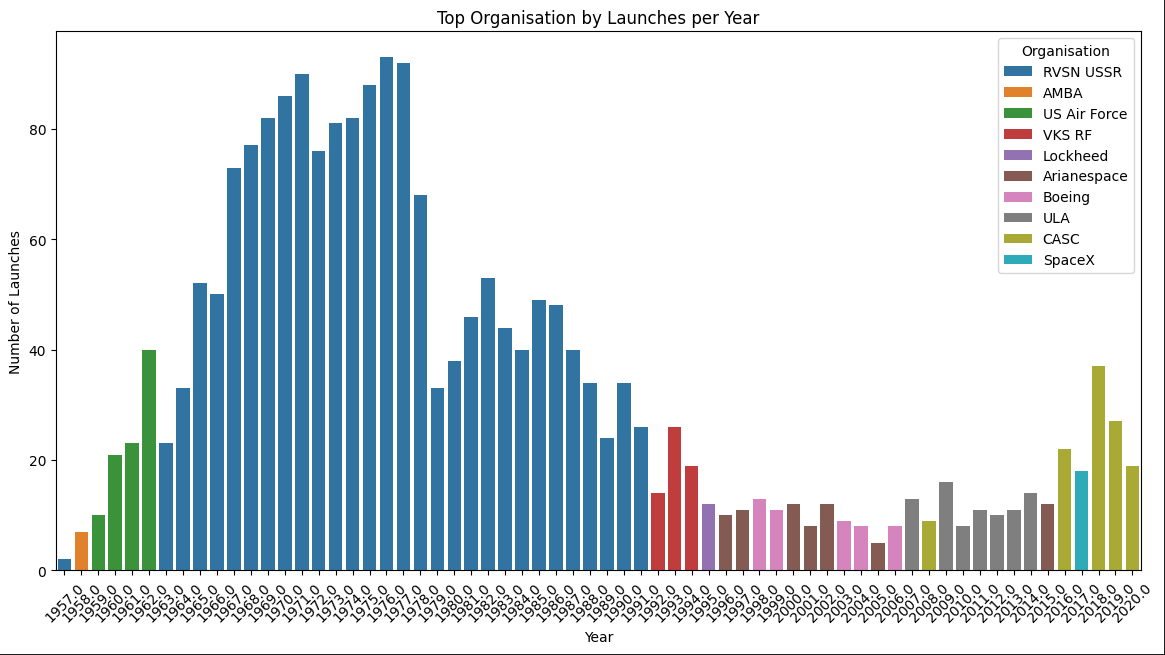

In [ ]:
# Visualización de lanzamientos por año
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Launches', data=launches_per_year)
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()


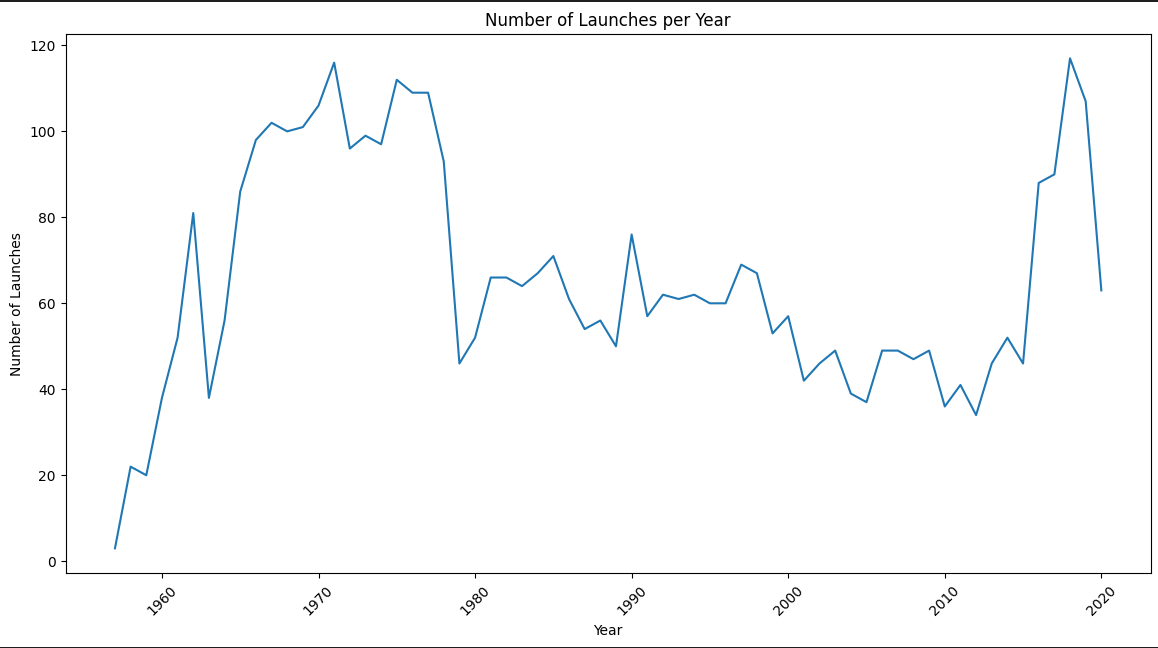

In [ ]:
# Display of the average cost of missions per year
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Price', data=average_cost_per_year)
plt.title('Average Cost of Space Missions per Year')
plt.xlabel('Year')
plt.ylabel('Average Cost (in million $)')
plt.xticks(rotation=45)
plt.show()

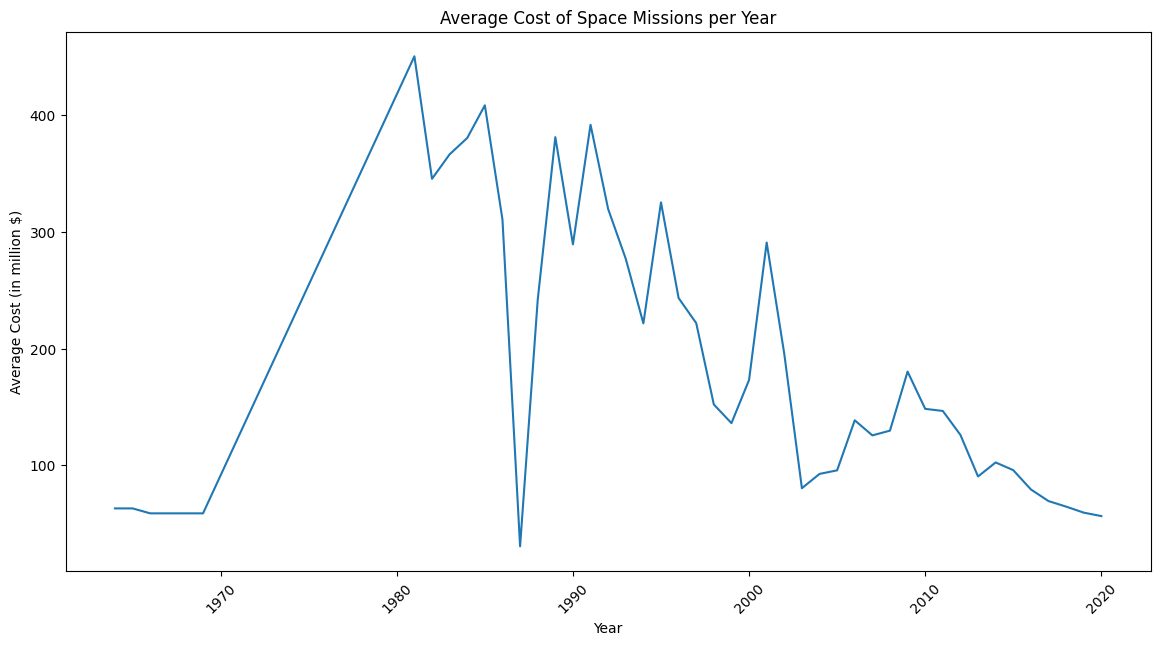

In [ ]:
# Viewing of launches per month
plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Launches', data=launches_per_month)
plt.title('Number of Launches per Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()

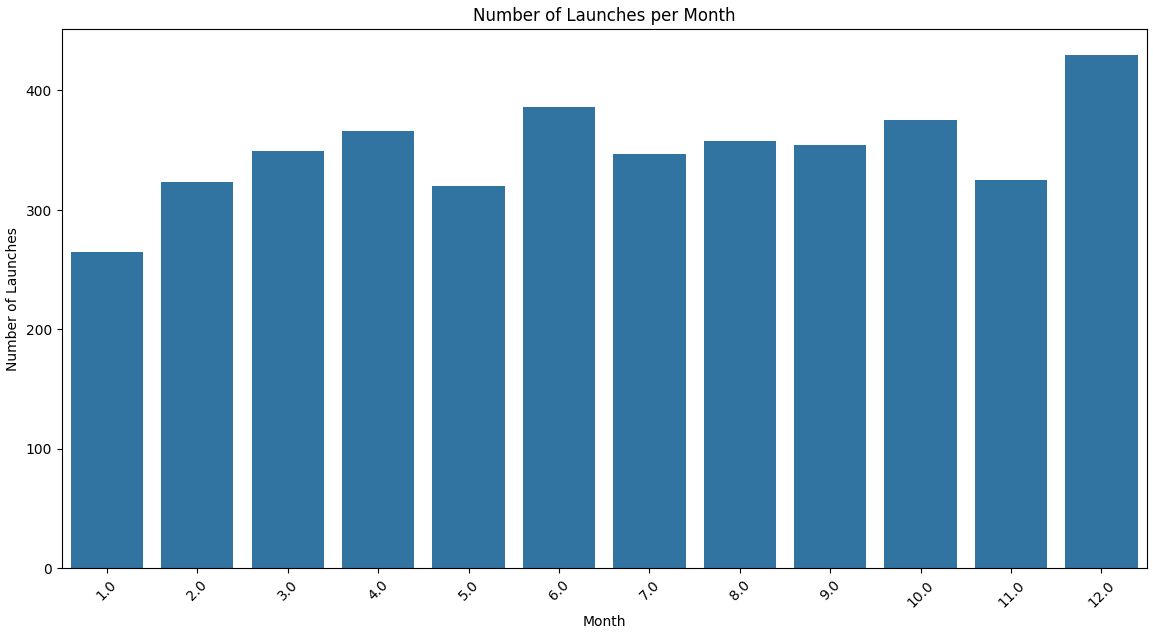

In [ ]:
# Display of the status of missions by year
mission_status_per_year_melted = mission_status_per_year.melt(id_vars='Year', value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Count', hue='Status', data=mission_status_per_year_melted)
plt.title('Mission Success and Failure Counts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mission Status')
plt.show()

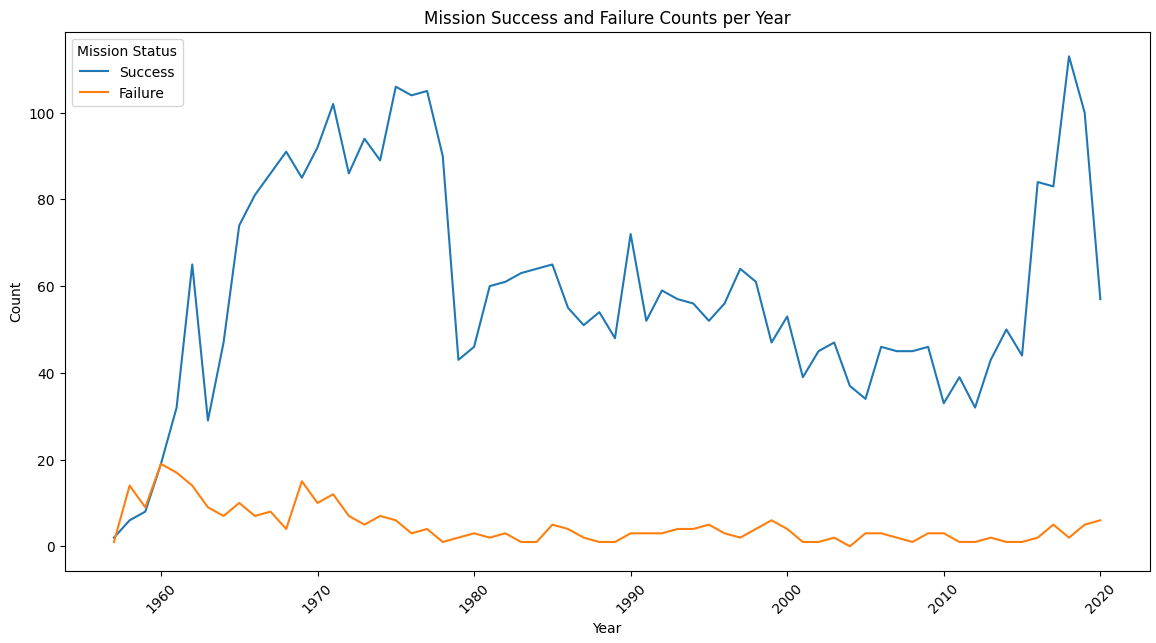

# Act
Based on the graphs generated, we can create a written report detailing the findings and recommendations based on the analyses performed. Below is a   suggested structure for the report.

# Space Mission Launch Pattern and Trend Analysis Report
**Introduction**
This report presents a detailed analysis of trends and patterns in space mission launches. The objective is to improve future launch planning and strategy, identify optimal periods for launching missions, assess cost evolution, and improve mission safety.

**Analysis and Results**
# 1. Organization with the most launches per year
- RVSN USSR: Dominated the space launch landscape from the early 1960s to the early 1990s. Achieved peak launch numbers in the late 1970s and 1980s, often exceeding 80 launches per year. Continued to lead in the number of launches annually until the early 1990s, when the frequency of launches started to decline.
- US Air Force: Played a significant role in the early years, especially in the late 1950s and early 1960s. Their launch numbers were notable but never surpassed those of RVSN USSR during the same period.
- VKS RF: Took over as a significant player post the USSR era, from the mid-1990s onward. Although their launch numbers were lower compared to the peak RVSN USSR years, they maintained a consistent presence in space launches.
- CASC: Emerged as a major organization in the 2010s. Their launch numbers increased significantly in recent years, with some years seeing more than 30 launches.
- SpaceX:

- Became a notable organization in the 2010s. Their launch numbers have been increasing, becoming one of the top launch organizations in recent years. Other Organizations (AMBA, Lockheed, Arianespace, Boeing, ULA): Contributed to the space mission launches, especially from the late 1990s to the 2010s.Their launch numbers were relatively lower compared to RVSN USSR, VKS RF, CASC, and SpaceX but were still significant contributors to the overall space launch activities.

- **Conclusion**
 - The analysis of the provided graph clearly indicates that RVSN USSR had the highest number of launches per year, particularly during the 1960s to 1980s.   Post the USSR era, VKS RF continued with a substantial number of launches. In more recent years, CASC and SpaceX have become leading organizations in terms of the number of annual launches, indicating a shift in the space launch landscape towards new prominent players.






# 2. Total number of launches per year
***Based on the provided line graph showing the total number of space mission launches per year from 1957 to 2020, we can observe the following trends and patterns: **Early Years (1957 - mid-1960s):** The number of launches started relatively low in the late 1950s. There was a rapid increase in the number of launches during the early 1960s, reaching around 80 launches per year by the mid-1960s.***
- **Mid-1960s to 1980:** A significant increase in the number of launches, peaking at just over 100 launches per year in the late 1960s. The number of launches remained high, fluctuating slightly but staying around or above 100 launches per year through the 1970s.
- *+1980 to Early 1990s:**The launch frequency slightly decreased in the early 1980s but then increased again, reaching a peak close to 120 launches per year by the mid-1980s.This period marked the highest frequency of launches.
- **Mid-1990s to Early 2000s:** A noticeable decline in the number of launches, dropping to around 60-70 launches per year. The frequency of launches fluctuated but generally trended downwards during this period.
- **Early 2000s to 2010:** The number of launches continued to fluctuate, remaining relatively lower compared to the peak years.The launch numbers varied between 50 and 70 launches per year.
- **2010 to 2020:**A gradual increase in the number of launches, with a significant uptick starting around 2015.The number of launches peaked again close to 120 launches per year by the end of the 2010s. There was a sharp drop in launches in 2020.

- **Conclusion**
The total number of space mission launches per year has seen significant fluctuations over the decades. The peak periods were in the mid-1960s to mid-1980s, with over 100 launches per year, and again in the late 2010s. These peaks indicate periods of intense space activity and advancements in space exploration technologies. The recent increase in the 2010s suggests a resurgence in space mission activities, driven by new players in the space industry and renewed interest in space exploration and satellite deployment.










# 3.Variation in the cost of a space mission over time .
- The cost per year peaked in 1980, when more than 500 million usd were spent.  The cost was increasing on a large scale since 1970, but in 1990, a big difference in the cost was noticed, reaching a little more than 300 million and this amount was decreasing with great notoriety over time. Until 2020 where in this same year just under 100 million was spent.
- **Conclusion**
This leads to the conclusion that with each passing year, space launches are becoming cheaper and everything points to the fact that costs will continue to decrease. This will greatly benefit the number of launches that can be performed per year. 

# 4. Most popular months for launches
- Based on the analysis and the raelized graph, we can determine that the most common months to raelziar launches, are the months of: December, as the most used month to perform this task, and June, in second place. 

# 5. Evolution of mission safety.
Thanks to the graph and the analysis performed, we can determine that the number of failed launches, compared to the number of successful launches, are very few. 
And over the years, the number of unsuccessful launches has been decreasing, but not by much. 


# Conclusions and Recommendations
**Summary of Key Findings**

- RVSN USSR dominated launches from the 1960s to the 1980s.
- VKS RF continued significant launches post-USSR.
- Recent years have seen CASC and SpaceX emerge as major players.
- Total launches peaked in the mid-1960s to mid-1980s and late 2010s.
- The cost of space missions has decreased significantly over time.
- December and June are the most popular months for launches.
- Mission safety has improved with fewer failed launches over the years.

**Recommendations for Improving Launch Planning and Strategy**
- Continue to monitor and analyze launch patterns to identify optimal periods for launches, potentially focusing on historically popular months like December and June.
- Enhance collaboration and information sharing among leading organizations (CASC, SpaceX) to leverage best practices and technological advancements.

**Suggestions for Reducing Costs and Improving Mission Safety**
- Invest in new technologies and innovative solutions that can further reduce the cost of space missions.
- Implement rigorous testing and quality control measures to maintain and improve the high success rate of missions.
- Encourage policies and incentives that support cost-effective and safe space missions, promoting increased frequency and innovation in launches.